In [13]:
from backtesting import Backtest, Strategy
from pricing import Pricing
# from SMACross import Crosscurrency
# from KNN_2020 import Knnpredictor_2020_before

import pandas as pd
# df = pd.read_csv("/Volumes/SeagateExpansion/dataForex_trades/CADUSD_minute.csv")
df = pd.read_csv("/Volumes/SeagateExpansion/dataForex/ETHUSD_day.csv")

df.head()

start_date = '2018-07-01'
end_date = '2022-04-30'
mask = (df['t'] > start_date) & (df['t'] <= end_date)
df = df.loc[mask]

df.shape

df['Open'] = df['o'] 
df['High'] = df['h'] 
df['Low'] = df['l'] 
df['Close'] = df['c'] 
df['Volume'] = df['v'] 

df2 = df[['Open','High','Low', 'Close', 'Volume']]
df2.index = pd.to_datetime((df['t']))

df2.tail()

from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG

class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price,3)
        self.ma2 = self.I(SMA, price,20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

            
import warnings
warnings.filterwarnings(action='once')
warnings.simplefilter(action='ignore', category=FutureWarning)


bt = Backtest(df2, SmaCross, cash = 10000,commission=.002,
              exclusive_orders=True)
stats = bt.run()
# # bt.plot()
# s3 = bt.plot()

/Users/leqisoon/Documents/Coding/RegimeD/myapp/KNN_2020.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['X_SMA10'] = (close - sma10) / close
/Users/leqisoon/Documents/Coding/RegimeD/myapp/KNN_2020.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['X_SMA20'] = (close - sma20) / close
/Users/leqisoon/Documents/Coding/RegimeD/myapp/KNN_2020.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Classification accuracy:  0.475968992248062


AttributeError: 'DataFrame' object has no attribute '_set_length'

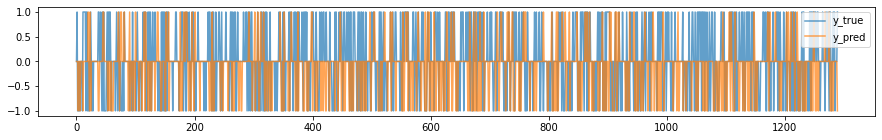

In [2]:
from KNN_2020 import Knnpredictor_2020_before

Knnpredictor_2020_before.run()
# Knnpredictor_2020_before.run()
# super(Knnpredictor_2020_before,self).run()